# Frequency Shift Key with String Inputs

## Group Members
- Panth Patel (AU1841020)
- Prachee Javiya (AU1841034)
- Shaili Gandhi (AU18410)
- Arpit Vaghela (AU1841034)

## Synopsis

Frequenct Shift Keying (FSK) is used to modulate Digital Signals to transmit them wirelessly. This modulation and demodulation is carried out by Physical Layers in devices. We have demonstrated BFS here, where two frequency values are used to represent binary values 1 and 0. The binary data is converted to these respective frequency analog signal, transmitted wirelessly and demodulated. 

We have modelled the transmitter such that is assumes two frequencies based on the value of input binary data and is made using a Synthesizer or Voltage Controlled Oscillator (VCO).

FM can be demodulated by converting the frequency changes to amplitude changes. Then techniques used to demodulate amplitude modulation (AM) can be applied. The receiver will use a differentiator to convert the frequencies to amplitudes, and then an envelope detector + low-pass filter to remove the carrier frequency and leave the data. Then a data slicer is used to convert the analog values to a digital signal. 

The recieved signal can be demodulated by converting Frequency changes to Amplitude changes and so the Amplitude Modulation techniques can be applied. The reciever is realised by a Diffrentiator which converts frequencies to amplitudes, Envelope Detector + Low-pass filter to remove the carrier frequency and finally a Data Slicer to convert the Analog Signal to Digital Signal.

## System Block Diagram

## Modules and Libraries

Given below is the Python code modules used in our Simulations

In [29]:
import bitarray

def tobitarray(s:str)->bitarray:
    ba = bitarray.bitarray()
    ba.frombytes(s.encode('utf-8'))
    return ba

def tostr(b:bitarray)->str:
    return bitarray.bitarray(b.tolist()).tobytes().decode('utf-8')

def padzero(b:bitarray,N:int)->bitarray:
    print(b.length())

import numpy as np
import scipy.signal.signaltools as sigtool
import scipy.signal as signal
from numpy.random import sample
import matplotlib.pyplot as pl

Fc = 1000       #simulate a carrier frequency of 1kHz
Fbit = 50       #simulated bitrate of data
Fdev = 500      #frequency deviation, make higher than bitrate
A = 1           #transmitted signal amplitude
Fs = 10000      #sampling frequency for the simulator, must be higher than twice the carrier frequency
A_n = 0.4       #noise peak amplitude
N_prntbits = 15 #number of bits to print in plots

## Data In
We have taken a String as an input and converted it into a binary sequence of 1 and 0. If the data input is 1 then m(t) = +$f_{dev}$ and id its 0 then m(t) = -$f_{dev}$ where $f_{dev}$ is the frequncy deviation from our center Carrier Frequency $F_c$. Hence an bitarray is created from the string inputted and is shown below.

80


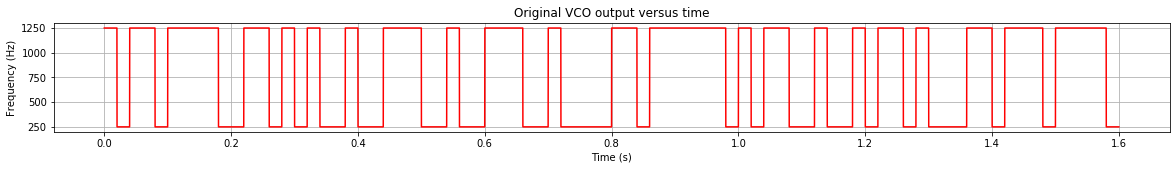

In [21]:
"""
Data in
"""
#generate some random data for testing
t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(Fs//Fbit),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(Fs//Fbit),Fc-Fdev)))
data_in = tobitarray("Hello Sir!")
N = len(data_in) #Total Data Bits to send
print(N)
np.seterr(divide = 'ignore') 
pl.figure(figsize=(20,2))
pl.plot(t[0:int(Fs*N//Fbit)],m[0:int(Fs*N//Fbit)], color = 'red')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO output versus time')
pl.grid(True)

## VCO

Voltage Controlled Oscillator (VCO) is used as a function generator whic produces a continous time Analog Signal from binary input mapping 
0 with $F_c - f_{dev}$ and 1 with $F_c + f_{dev}$ and producing an ouput cosine wave as
$$y = Acos(2\pi t(F_c + m(t)))$$
where

$y$ is Transmitted Signal

$A$ is the Amplitude of Transmitted Signal

$F_c$ is the Carrier Frequncy

The original bit stream has to be extended to match the Sampling Frequency for Simulation. The output from the VCO is shown as below. We have just demonstrated the first 15 bits to make the plots clear or the VCO output can not be seen clearly. The third plot is the Frequncy spectrum of the Transmitted wave.

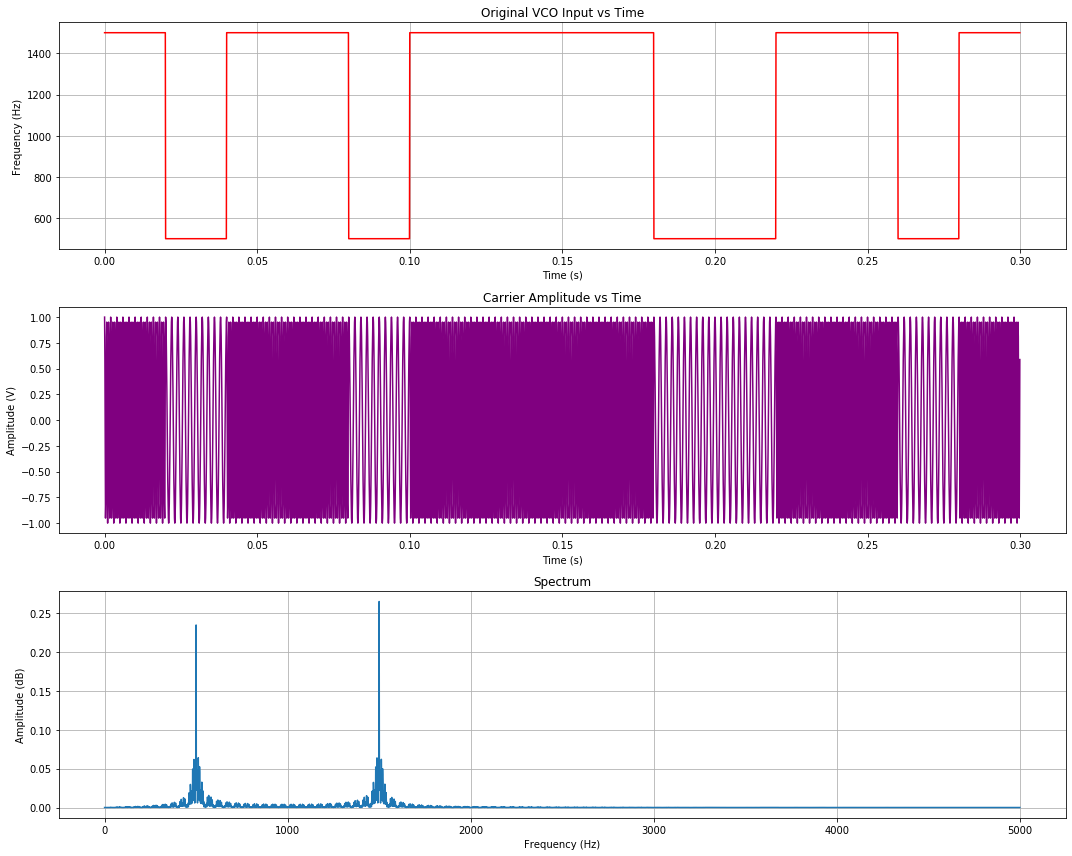

In [30]:
"""
Output Waveform
"""

t = np.arange(0,float(N)/float(Fbit),1/float(Fs), dtype=np.float)
#extend the data_in to account for the bitrate and convert 0/1 to frequency
m = np.zeros(0).astype(float)
for bit in data_in:
    if bit == 0:
        m=np.hstack((m,np.multiply(np.ones(Fs//Fbit),Fc+Fdev)))
    else:
        m=np.hstack((m,np.multiply(np.ones(Fs//Fbit),Fc-Fdev)))
#calculate the output of the VCO
y=np.zeros(0)
y=A * np.cos(2*np.pi*np.multiply(m,t))
np.seterr(divide = 'ignore') 
pl.figure(figsize=(15,12))
pl.subplot(311)
pl.plot(t[0:int(Fs*N_prntbits//Fbit)],m[0:int(Fs*N_prntbits//Fbit)], color = 'red')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO Input vs Time')
pl.grid(True)
pl.subplot(312)
pl.plot(t[0:int(Fs*N_prntbits//Fbit)],y[0:int(Fs*N_prntbits//Fbit)], color = 'purple')
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('Carrier Amplitude vs Time')
pl.subplot(313)
pl.magnitude_spectrum(y, Fs)
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)
pl.tight_layout()
pl.show()

## Noisy Channel

Transmitting the signal over the ait introduces Noise. We have demonstrated it using $n(t)$ and sometimes if the noise level becomes strong then the signal cannot be Demodulated correctly.
$$y = Acos(2\pi t(F_c + m(t))) + n(t)$$
where

$n(t)$ is White Gaussian Noise

We have introduced the Noise as AWGN and added it to the Transmitted Signal. We have codded it such that the Maximum Amplitude of noise it set to 0.1 which approximately creates a SNR of 14dB. We have plotted the Signal corrupted with the AWGN and the Magnitude Spectrum.

SNR = 1.929076dB


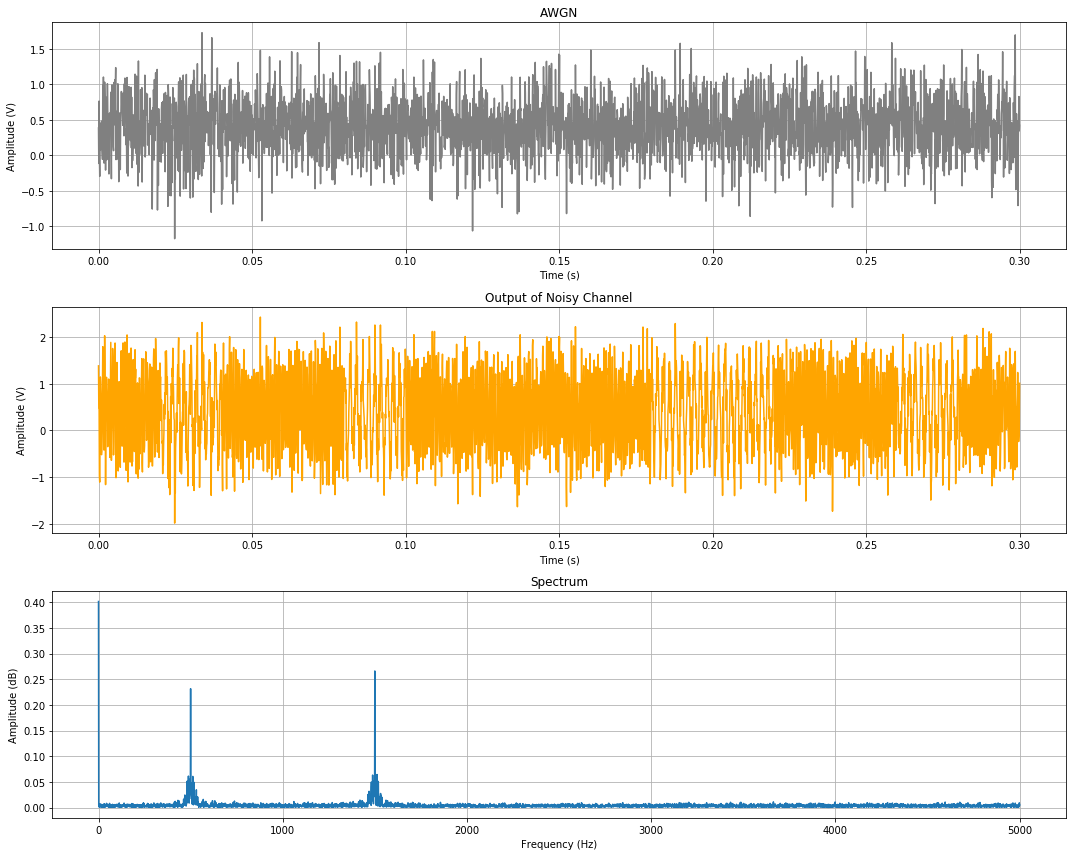

In [31]:
"""
Noisy Channel
"""
#create some noise
noise = (np.random.randn(len(y))+1)*A_n

snr = 10*np.log10(np.mean(np.square(y)) / np.mean(np.square(noise)))
print ("SNR = %fdB" % snr)
y=np.add(y,noise)
np.seterr(divide = 'ignore') 
pl.figure(figsize=(15,12))
pl.subplot(311)
pl.plot(t[0:int(Fs*N_prntbits//Fbit)],noise[0:int(Fs*N_prntbits//Fbit)], color = 'gray')
pl.xlabel('Time (s)')
pl.ylabel('Amplitude (V)')
pl.title('AWGN')
pl.grid(True)
pl.subplot(312)
pl.plot(t[0:int(Fs*N_prntbits//Fbit)],y[0:int(Fs*N_prntbits//Fbit)], color = 'orange')
pl.xlabel('Time (s)')

pl.ylabel('Amplitude (V)')
pl.title('Output of Noisy Channel')
pl.grid(True)
pl.subplot(313)
pl.magnitude_spectrum(y, Fs)
pl.xlabel('Frequency (Hz)')
pl.ylabel('Amplitude (dB)')
pl.title('Spectrum')
pl.grid(True)

pl.tight_layout()
pl.show()

## Envelope Detector and Diffrentiator

The Reciever side, the recieved signal is first passed through a Diffrentiator to seperated the data signal from the Carrier Frequency.

$$-\frac{dy}{dt} = 2\pi A(f + m(t) + t\frac{dm(t)}{dt})sin(2\pi t(F_c + m(t))) + \frac{dn(t)}{dt}$$

We have simplified the equation by dropping the phase shift and we know that $\frac{dm}{dt}$ is 0 due to constant shifts in frequency. We get

$$\frac{dy}{dt} = -A'(f + m(t))sin(2\pi t(F_c + m(t))) + \frac{dn(t)}{dt}$$

The Envelope detector is used to seperate the high-frequency carrier from the low frequency data. The filter used is Low-Pass which only allows digital data to go through.

$$y_{filt} = A(f + m(t)) + \frac{dn(t)}{dt}$$

In Simulation, we have used the discrete diffrentiation function for implementing Diffrentiator. The envelope detection is dont using Hilbert Transform. It changes the phase of the input function by 90 Degrees. 
$$F(t) = \frac{1}{\pi}\int_{\infty}^{-\infty}\frac{f(x)}{t - x}dx$$

The output signal $F(t)$ has a phase change by 90 Degrees. It is used for creating an analytic function $Y(t) = f(t) + i\hat{f(t)}$ where $\hat{f(t)}$ is the transformed function. In our case, the Sin function changes to Cos and multiplying the functions $f(t) + i\hat{f(t)}$ and $f(t) - i\hat{f(t)}$ we get the output in the from of $A(f + m(t)) + \frac{dn(t)}{dt}$ after applying the filter. The filter used here is an FIR filter with 100 taps and cutoff frequency of twice the bitrate.

The plots given below are of the Initial input bitstream and the output of the Envelope Detector.

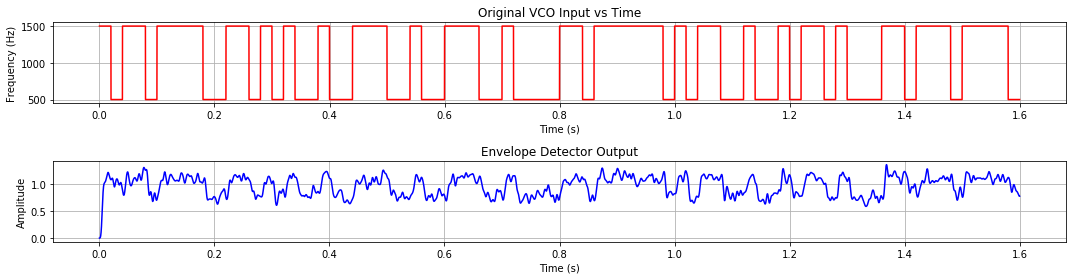

In [32]:
"""
Differentiator
"""
y_diff = np.diff(y,1)

"""
Envelope detector + low-pass filter
"""
#create an envelope detector and then low-pass filter
y_env = np.abs(sigtool.hilbert(y_diff))
h=signal.firwin( numtaps=100, cutoff=Fbit*2, nyq=Fs/2)
y_filtered=signal.lfilter( h, 1.0, y_env)
np.seterr(divide = 'ignore') 
pl.figure(figsize=(15,4))
pl.subplot(211)
pl.plot(t[0:int(Fs*N//Fbit)],m[0:int(Fs*N//Fbit)], color = 'red')
pl.xlabel('Time (s)')
pl.ylabel('Frequency (Hz)')
pl.title('Original VCO Input vs Time')
pl.grid(True)
pl.subplot(212)
pl.plot(t[1:int(Fs*N//Fbit)],y_filtered[0:int((Fs*N)//Fbit)], color = 'blue')
pl.grid(True)
pl.xlabel('Time (s)')
pl.ylabel('Amplitude')
pl.title('Envelope Detector Output')
pl.tight_layout()
pl.show()

## Slicer

Slicer is used for removing the DC offset from the incoming wave and some part of the noise. Slicer cannot remove noise completely and sometimes if the noise is high as in the SNR decreases, the Signal cannot be interpreted Properly. After implementing slicer we are left with 

$$y = m(t) + \frac{dn(t)}{dt}$$

The original signal with some noise.

Slicer calculates the mean of the signal and sets it as a threshold. It uses it as a decision threshold to decide if the bit was 1 or 0. If the Signal is greater than the threshold then the bit is interpreted as 1 else 0 and hence a bitarray is created. 

To Calculate the percentage error, the Recieved bit array is compared with the initial Bit Array and check how many bits are corrupted due to noise.

We did our simulations, setting the Noise Amplitude as 0.45 which produced SNR of 0.88 dB. The text Transmitted was "Hello Sir!" and the text Recieved was "HelhMSir!" with 5 bit errors and bit error percent of 6.25 %.

In [33]:
"""
slicer
"""
#calculate the mean of the signal
mean = np.mean(y_filtered)
#if the mean of the bit period is higher than the mean, the data is a 0
rx_data = []
sampled_signal = y_filtered[int(Fs/Fbit/2):len(y_filtered):int(Fs/Fbit)]
for bit in sampled_signal:
    if bit > mean:
        rx_data.append(0)
    else:
        rx_data.append(1)

bit_error=0
for i in range(0,len(data_in)):
    if rx_data[i] != data_in[i]:
        bit_error+=1
print ("bit errors = %d" % bit_error)
print ("bit error percent = %4.2f%%" % (float(bit_error)/float(N)*100))
print(tostr(bitarray.bitarray(rx_data)))


bit errors = 2
bit error percent = 2.50%
ello Sir 


## Results
We did our simulations as followed

Carrier Frequency $F_c$ = 1kHz

Frequency Deviation $f_{dev}$ = 0.5kHz

Noise Amplitude = 0.4 which produced SNR = 1.92 dB

Input text = "Hello Sir!"

Total Bits Transmitted = 80

Output Text = "ello Sir"

Total Bit Errors = 2

Percentage Bit Error = 2.75
